In [136]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import itertools
import pathlib 
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation,  Dropout,  BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax 
from tensorflow.keras.preprocessing.image import ImageDataGenerator   

In [137]:
master_folder="C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images"
combined_folder="C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/combined_dataset"

In [138]:

ls_paths=[]
for  folders in os.listdir(master_folder):
     folder_paths=os.path.join(master_folder,folders)
     ls_paths.append(folder_paths)
    


c=[] 
labels=[]
for i in ls_paths:
    for items in os.listdir(i):
        c.append(i+"/"+items)


labels = [os.path.basename(os.path.dirname(file_path)) for file_path in c]        



In [139]:
import shutil
for file_path in c:
    shutil.copy(file_path, combined_folder)

In [140]:
print(c)

['C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images\\Lilly/00048a5c76.jpg', 'C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images\\Lilly/001ff6644e.jpg', 'C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images\\Lilly/001ff6656j.jpg', 'C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images\\Lilly/005fb079bf.jpg', 'C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images\\Lilly/00973ad1b1.jpg', 'C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images\\Lilly/00a7d512d6.jpg', 'C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/5-flower-types-classification-dataset/flower_images\\Lilly/00f36a3c40.jpg', 'C:/Users/kusha/OneDrive/Desktop/Task/De

In [86]:
# image_paths=[]
# for i in os.listdir(combined_folder):
#     image_paths.append(i)

In [141]:
data=pd.DataFrame(c,labels)

In [142]:
data = data.rename(columns={'': 'Labels', '0': 'File_paths'}).reset_index()

data=data.rename(columns={'index': 'Labels', 0: 'File_paths'})

In [143]:
img = Image.open(data['File_paths'][0])  

width, height = img.size  
print(width,height)

275 183


In [144]:
data

,Labels,File_paths
0,Lilly,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
1,Lilly,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
2,Lilly,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
3,Lilly,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
4,Lilly,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
...,...,...
4980,Tulip,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
4981,Tulip,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
4982,Tulip,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...
4983,Tulip,C:/Users/kusha/OneDrive/Desktop/Task/Deep_Lear...


In [145]:
train,dummy=train_test_split(data,train_size=0.8,shuffle=True,random_state=42)
valid,test=train_test_split(dummy,test_size=0.4,shuffle=True,random_state=42)

print("Train Data Shape", train.shape)
print("Test Data Shape", test.shape)
print("Valid Data Shape", valid.shape)

Train Data Shape (3988, 2)
Test Data Shape (399, 2)
Valid Data Shape (598, 2)


In [146]:
image_size=(270, 180)
channels=3
batches=32

tr_gen=ImageDataGenerator()
ts_gen=ImageDataGenerator()

train_gen=tr_gen.flow_from_dataframe(train,x_col='File_paths',y_col='Labels',target_size=image_size,class_mode='categorical',color_mode='rgb',batch_size=batches)

test_gen=ts_gen.flow_from_dataframe(test,x_col='File_paths',y_col='Labels',target_size=image_size,class_mode='categorical',color_mode='rgb',batch_size=batches)

valid_gen=ts_gen.flow_from_dataframe(valid,x_col='File_paths',y_col='Labels',target_size=image_size,class_mode='categorical',color_mode='rgb',batch_size=batches)






Found 3988 validated image filenames belonging to 5 classes.
Found 399 validated image filenames belonging to 5 classes.
Found 598 validated image filenames belonging to 5 classes.


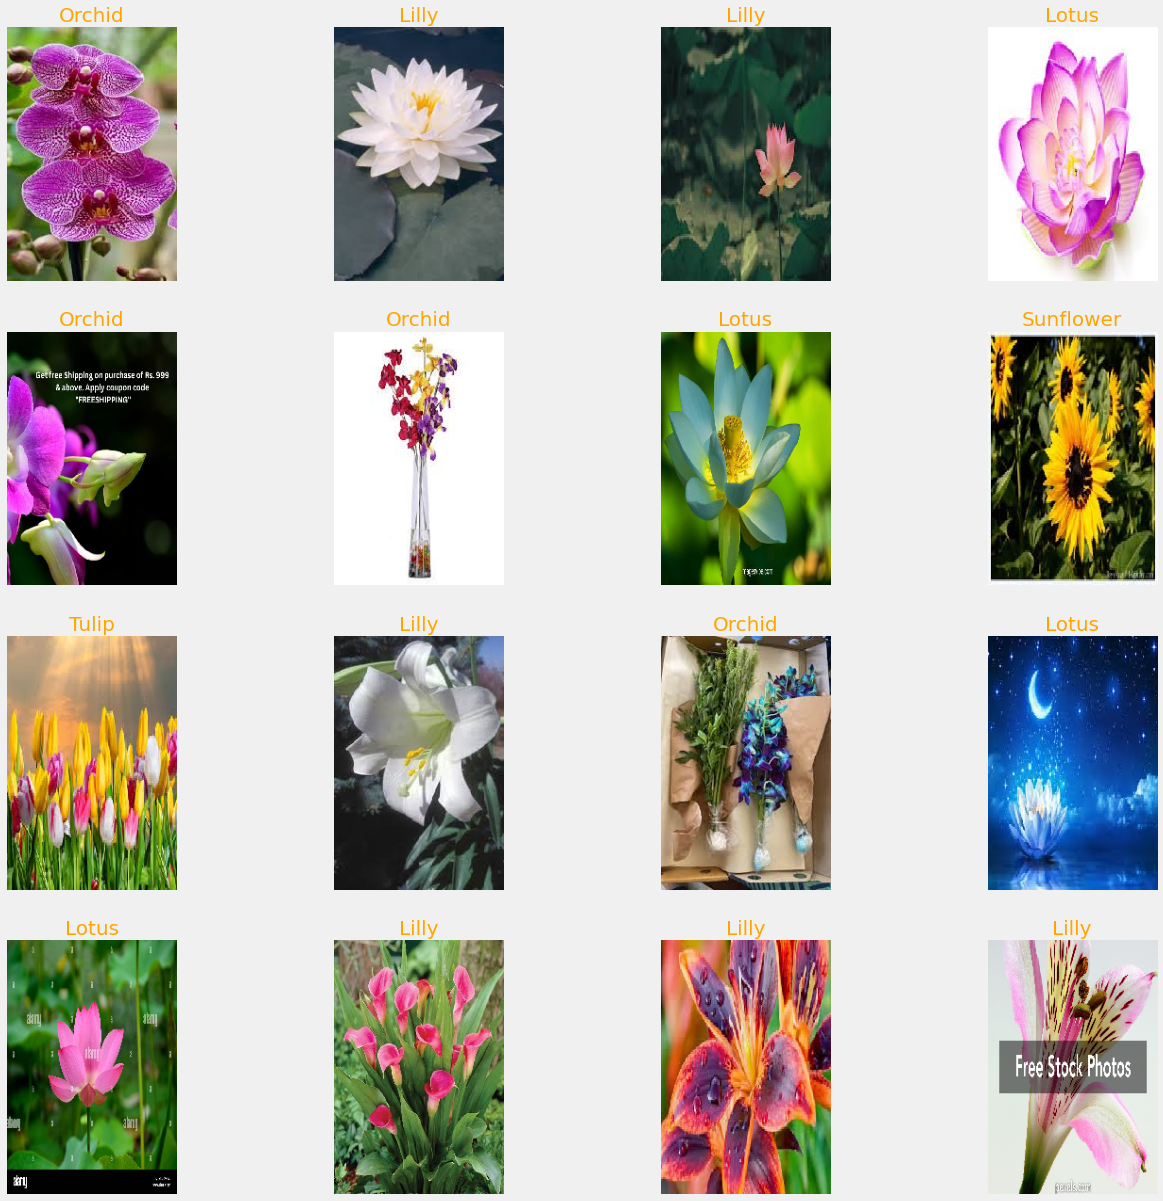

In [147]:
dict_gen=train_gen.class_indices
classes=list(dict_gen.keys())

images,labels=next(train_gen)

plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    image=images[i]/255
    plt.imshow(image)
    index=np.argmax(labels[i])
    class_name=classes[index]
    plt.title(class_name,color='orange',fontsize=20)
    plt.axis('off')

plt.show()

    

In [148]:
channels=3
img_shape=(image_size[0],image_size[1],channels)
class_count=len(classes)

base_model=tf.keras.applications.efficientnet.EfficientNetB1(include_top=False, weights='imagenet',input_shape=img_shape,pooling='max')

for layer in base_model.layers:
    layer.trainable=False


model=Sequential([base_model,BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001),Dense(256,activation='relu'), Dense(class_count,activation='softmax')])

In [149]:
model.compile(Adamax(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 efficientnetb1 (Functional)  (None, 1280)             6575239   
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               327936    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 6,909,580
Trainable params: 331,781
Non-trainable params: 6,577,799
_________________________________________________________________


In [150]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = "./cp.weights.h5"
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,   # Filepath where the model is saved
    monitor='val_loss',               # Metric to monitor (e.g., validation loss)
    save_best_only=True,              # Save only when the model improves
    mode='min',                       # 'min' if monitoring loss (lower is better)
    verbose=1                         # Print messages when saving
)


In [127]:
num_epochs=15
flower_model=model.fit(x=train_gen,validation_data=valid_gen,epochs=num_epochs,verbose=1,validation_steps=None,shuffle=False, callbacks=checkpoint)

Epoch 1/15
125/125 [==============================] - ETA: 0s - loss: 0.6438 - accuracy: 0.7653
Epoch 1: val_loss improved from inf to 0.49828, saving model to .\cp.weights.h5
125/125 [==============================] - 175s 1s/step - loss: 0.6438 - accuracy: 0.7653 - val_loss: 0.4983 - val_accuracy: 0.8512
Epoch 2/15
125/125 [==============================] - ETA: 0s - loss: 0.2932 - accuracy: 0.8977
Epoch 2: val_loss improved from 0.49828 to 0.35465, saving model to .\cp.weights.h5
125/125 [==============================] - 251s 2s/step - loss: 0.2932 - accuracy: 0.8977 - val_loss: 0.3547 - val_accuracy: 0.8980
Epoch 3/15
125/125 [==============================] - ETA: 0s - loss: 0.2102 - accuracy: 0.9318
Epoch 3: val_loss improved from 0.35465 to 0.31720, saving model to .\cp.weights.h5
125/125 [==============================] - 254s 2s/step - loss: 0.2102 - accuracy: 0.9318 - val_loss: 0.3172 - val_accuracy: 0.9047
Epoch 4/15
125/125 [==============================] - ETA: 0s - loss

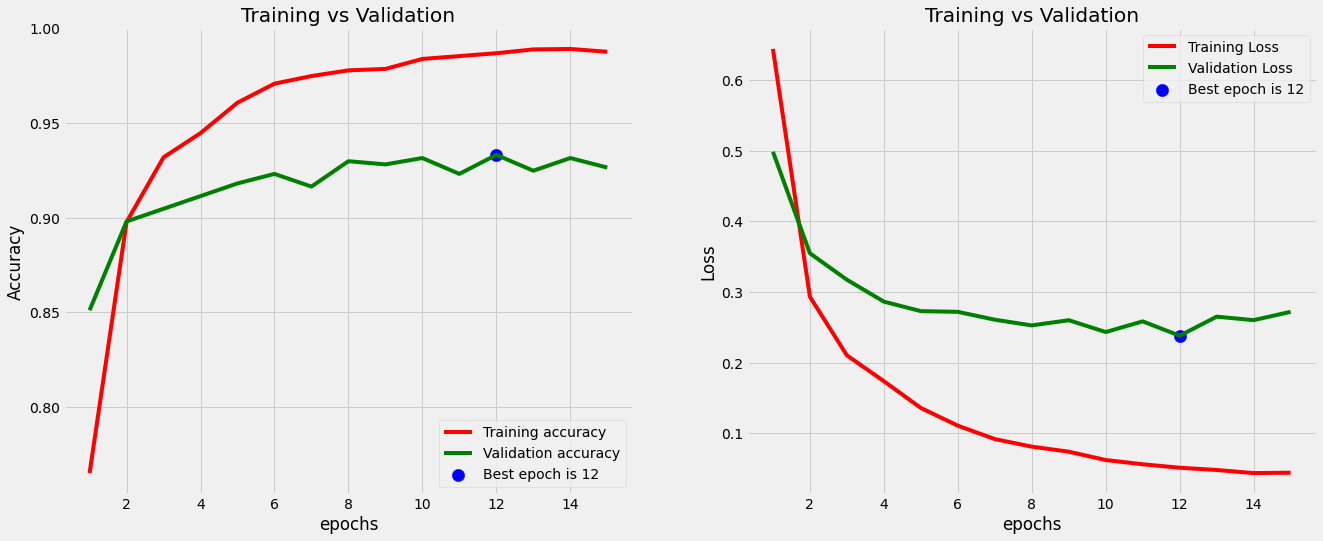

In [151]:
train_accuracy=flower_model.history['accuracy']
train_loss=flower_model.history['loss']

val_acc=flower_model.history['val_accuracy']
val_loss=flower_model.history['val_loss']

index_loss=np.argmin(val_loss)
index_acc= np.argmax(val_acc)

val_lowest=val_loss[index_loss]
val_highest=val_acc[index_acc]


epochs=[i+1 for i in range(len(train_accuracy))]

acc_label= f'Best epoch is {str(index_acc+1)}'

loss_label= f'Best epoch is {str(index_loss+1)}'

plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epochs,train_accuracy,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'g',label='Validation accuracy')
plt.scatter(index_acc+1,val_highest,s=150,c='blue',label=acc_label)
plt.title("Training vs Validation")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()





plt.subplot(1,2,2)
plt.plot(epochs,train_loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Validation Loss')
plt.scatter(index_loss+1,val_lowest,s=150,c='blue',label=loss_label)
plt.title("Training vs Validation")
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout
plt.show()














In [161]:
train_score = flower_model.model.evaluate(train_gen , steps= 16 , verbose = 1)
val_score = flower_model.model.evaluate(valid_gen , steps = 16 , verbose = 1)
test_score = flower_model.model.evaluate(test_gen , steps= 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

16/16 [==============================] - 16s 981ms/step - loss: 0.2306 - accuracy: 0.9248
Train Loss:  0.02043890208005905
Train Accuracy:  0.994140625
--------------------
Validation Loss:  0.28248605132102966
Validation Accuracy:  0.92578125
--------------------
Test Loss:  0.2305675894021988
Test Accuracy:  0.9248120188713074


In [ ]:
preds = model.predict(test_gen)

y_pred = np.argmax(preds , axis = 1)


g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


print(classification_report(test_gen.classes , y_pred , target_names = classes))


In [4]:
#max pooling running operation

import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D

input_image=tf.constant([[[[1],[2],[3],[4]], [[5],[6],[7],[8]],[[2],[4],[1],[3]],[[9],[7],[8],[5]]]],dtype=tf.float32)

max_pool= MaxPooling2D(pool_size=(2,2),strides=2)
output_image=max_pool(input_image)

print(output_image.numpy())

[[[[6.]
   [8.]]

  [[9.]
   [8.]]]]


In [6]:
channels=3
#img_shape=(image_size[0],image_size[1],channels)
#class_count=len(classes)

base_model=tf.keras.applications.efficientnet.EfficientNetB1(include_top=False, weights='imagenet',input_shape=(275,275,3),pooling='max')

In [8]:
def ensemble_model(models):
    # for i,model in enumerate(models):
    #     print(i,layers)
    for i,layer in enumerate(base_model.layers):
        print(i,layer)


idea=ensemble_model(base_model)
print(idea)



0 <InputLayer name=input_layer, built=True>
1 <Rescaling name=rescaling, built=True>
2 <Normalization name=normalization, built=True>
3 <Rescaling name=rescaling_1, built=True>
4 <ZeroPadding2D name=stem_conv_pad, built=True>
5 <Conv2D name=stem_conv, built=True>
6 <BatchNormalization name=stem_bn, built=True>
7 <Activation name=stem_activation, built=True>
8 <DepthwiseConv2D name=block1a_dwconv, built=True>
9 <BatchNormalization name=block1a_bn, built=True>
10 <Activation name=block1a_activation, built=True>
11 <GlobalAveragePooling2D name=block1a_se_squeeze, built=True>
12 <Reshape name=block1a_se_reshape, built=True>
13 <Conv2D name=block1a_se_reduce, built=True>
14 <Conv2D name=block1a_se_expand, built=True>
15 <Multiply name=block1a_se_excite, built=True>
16 <Conv2D name=block1a_project_conv, built=True>
17 <BatchNormalization name=block1a_project_bn, built=True>
18 <DepthwiseConv2D name=block1b_dwconv, built=True>
19 <BatchNormalization name=block1b_bn, built=True>
20 <Activation

In [8]:
#python 15 questions

#q1

x=[1,5,9,0]
y=[1,0,2,9]

set(x).intersection (set(y))

{0, 1, 9}

In [14]:
#q2


x=[1,2,3,1,3,6,5]
x=list( set( i for i in x if x.count(i) >1))

In [18]:

#q3

arr=[1,2,3,4,5,6]

sorted(arr)

[1, 2, 3, 4, 5, 6]

In [19]:
print(arr[-1]*arr[-2]*arr[-3])

120


In [ ]:


def maxSubArraySum(arr):
    # Initialize variables
    max_so_far = arr[0] # -2
    max_ending_here = arr[0] -2

    # Loop through the array starting from the second element
    for num in arr[1:]:
        # Update max_ending_here to be either the current element
        # or the current element added to the previous subarray
        max_ending_here = max(num, max_ending_here + num)   

        # Update max_so_far to be the maximum of itself or max_ending_here
        max_so_far = max(max_so_far, max_ending_here)

    return max_so_far

# Example usage:
arr = [-2, 1, -3, 4, -1, 2, 1, -5, 4]
print("Maximum sum of contiguous subarray:", maxSubArraySum(arr))




In [22]:
arr=[3,2,5,2,6,8,9]

def subcont_array(arr):
    max_end_here=arr[0]
    max_so_far=arr[0]

    for element in arr[1:]:
        max_ending_here=max(element, max_end_here+element)
        max_so_far=max(max_end_here,max_so_far)

    return max_so_far    

In [23]:
subcont_array(arr)

3

In [ ]:
import numpy as np

def euclidean_distance(series1, series2):
    # Convert to numpy arrays
    series1 = np.array(series1)
    series2 = np.array(series2)
    
    # Compute the Euclidean distance
    distance = np.sqrt(np.sum((series1 - series2) ** 2))
    
    return distance

# Example usage:
series1 = [1, 2, 3]
series2 = [4, 5, 6]

print("Euclidean Distance:", euclidean_distance(series1, series2))


In [24]:
import numpy as np
N=100
x=np.random.randn((N,))
plt.hist(x)


TypeError: 'tuple' object cannot be interpreted as an integer

In [30]:
input_str='pythoninterviewquestion'

def recurring_first(input_str):
    a_str=""
    for letter in input_str:
        a_str=a_str+letter
        if a_str.count(letter)>1:
            return letter
    return None
    
recurring_first(input_str)    



'n'